<a href="https://colab.research.google.com/github/Viratvenom/Amitsingh-/blob/main/EDA_AND_Feature_Engineering_Of_Google_Play_Store_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA AND Feature Engineering Of Google Play Store Dataset**
1.The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the
android apps. Explore and analyse the data to discover key factors responsible for app engagement and success.
2. Data Collection
The data consists of 20 column and 10841 rows.

In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [240]:
df=pd.read_csv('/content/Play Store Data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [241]:
df.shape

(10841, 13)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [243]:
#summary of the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [244]:
#missing values
df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


# *Insight and observation*
The dataset has missing values

In [245]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


**Data cleaning**

In [246]:
#Check all the values of reviews
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [247]:
df['Reviews'].str.isnumeric().sum()

10840

In [248]:
#not numeric
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [249]:
df.shape

(10841, 13)

In [252]:
df_copy=df.copy()

In [253]:
#Drop the data
df_copy=df_copy.drop(df_copy.index[10472])

In [254]:
df_copy.shape

(10840, 13)

convert data type to int

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [256]:
#convert Reviews Datatype to int
df_copy['Reviews']=df_copy['Reviews'].astype(int)
df_copy['Reviews'].dtype


dtype('int64')

indivisual unique values

In [257]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [260]:
#convert "M"into"K" units (replace)
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].str.replace('Varies with device',"nan")
df_copy['Size'].unique()

array(['19000', '14000', '8.7000', '25000', '2.8000', '5.6000', '29000',
       '33000', '3.1000', '28000', '12000', '20000', '21000', '37000',
       '2.7000', '5.5000', '17000', '39000', '31000', '4.2000', '7.0000',
       '23000', '6.0000', '6.1000', '4.6000', '9.2000', '5.2000', '11000',
       '24000', 'nan', '9.4000', '15000', '10000', '1.2000', '26000',
       '8.0000', '7.9000', '56000', '57000', '35000', '54000', '201',
       '3.6000', '5.7000', '8.6000', '2.4000', '27000', '2.5000', '16000',
       '3.4000', '8.9000', '3.9000', '2.9000', '38000', '32000', '5.4000',
       '18000', '1.1000', '2.2000', '4.5000', '9.8000', '52000', '9.0000',
       '6.7000', '30000', '2.6000', '7.1000', '3.7000', '22000', '7.4000',
       '6.4000', '3.2000', '8.2000', '9.9000', '4.9000', '9.5000',
       '5.0000', '5.9000', '13000', '73000', '6.8000', '3.5000', '4.0000',
       '2.3000', '7.2000', '2.1000', '42000', '7.3000', '9.1000', '55000',
       '23', '6.5000', '1.5000', '7.5000', '51000'

In [261]:
#convert  Datatype to int
df_copy['Size']=df_copy['Reviews'].astype(float)
df_copy['Size'].dtype


dtype('float64')

In [262]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [263]:
#remove "+" replace with " "
df_copy['Installs']=df_copy['Installs'].str.replace('+','')
df_copy['Installs']=df_copy['Installs'].str.replace(',','')
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [264]:
#convert  Datatype to int
df_copy['Install']=df_copy['Installs'].astype(int)
df_copy['Install'].dtype

dtype('int64')

In [265]:
df_copy['Type'].unique()
#replace "nan" as free

array(['Free', 'Paid', nan], dtype=object)

In [266]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [267]:
#Remove sign : "$" ," "
df_copy['Price']=df_copy['Price'].str.replace('$','')
df_copy['Price']=df_copy['Price'].str.replace(' ','')
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [268]:
#convert  Datatype to int
df_copy['Price']=df_copy['Reviews'].astype(float)
df_copy['Price'].dtype

dtype('float64')

In [269]:
df_copy['Installs'].unique()
#convert  Datatype to int
df_copy['Installs']=df_copy['Reviews'].astype(int)
df_copy['Installs'].dtype


dtype('int64')

In [270]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Install         10840 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ MB


In [271]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,159.0,159,Free,159.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,967.0,967,Free,967.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000


In [272]:
#Handling "Last Updated" feature
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [273]:
#convert into date_time
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated'].dtype

dtype('<M8[ns]')

In [274]:
df_copy['Last Updated'].unique()

<DatetimeArray>
['2018-01-07 00:00:00', '2018-01-15 00:00:00', '2018-08-01 00:00:00',
 '2018-06-08 00:00:00', '2018-06-20 00:00:00', '2017-03-26 00:00:00',
 '2018-04-26 00:00:00', '2018-06-14 00:00:00', '2017-09-20 00:00:00',
 '2018-07-03 00:00:00',
 ...
 '2015-11-23 00:00:00', '2012-06-17 00:00:00', '2015-02-27 00:00:00',
 '2013-12-18 00:00:00', '2012-02-06 00:00:00', '2014-11-25 00:00:00',
 '2016-05-19 00:00:00', '2014-01-20 00:00:00', '2014-02-16 00:00:00',
 '2014-03-23 00:00:00']
Length: 1377, dtype: datetime64[ns]

In [275]:
#seprate date and months columns "Last Updated'
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [276]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,159.0,159,Free,159.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,967.0,967,Free,967.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,15,1,2018


In [277]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Install         10840 non-null  int64         
 14  Day             10840 non-null  int32         
 15  Month  

In [278]:
#Handel missing value
df_copy.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [192]:
#unique value "Rating"
df_copy['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [226]:
#find the nan coloum in "Rating" column
df_copy[df_copy['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install,Day,Month,Year
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,61.0,61,Free,61.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up,100000,7,3,2018
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,182.0,182,Free,182.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up,100000,20,9,2017
123,Manicure - nail design,BEAUTY,NaN,119,119.0,119,Free,119.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up,50000,23,7,2018
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,654.0,654,Free,654.0,Teen,Beauty,2018-07-17,1.15,4.1 and up,100000,17,7,2018
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,77.0,77,Free,77.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up,10000,8,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,67.0,67,Free,67.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up,10000,31,7,2018
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.0,7,Free,7.0,Teen,Social,2018-02-02,1.0,4.0 and up,100,2,2,2018
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,38.0,38,Free,38.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up,5000,13,6,2018
10835,FR Forms,BUSINESS,NaN,0,0.0,0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up,10,29,9,2016


save orginal_copy_csv_file

In [279]:
df_copy.to_csv('cleaned_data.csv')

# **EDA**

In [280]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Install,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,159.0,159,Free,159.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10000,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,967.0,967,Free,967.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,500000,15,1,2018


In [281]:
#check is duplicated or not
df_copy[df_copy.duplicated("App")].shape

(1181, 17)

**Observation**

In [282]:
#Drop duplicated "app"
df_copy.drop_duplicates(subset="App",inplace=True)


#Explore **Data**

In [284]:
#Seperate numerical_feature and categorical_feature
numerical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']
print("numerical_feature:",numerical_feature)
print("categorical_feature:",categorical_feature)


numerical_feature: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Install', 'Day', 'Month', 'Year']
categorical_feature: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


In [285]:
#Poporation of count data on categorical_feature in the from of percantage
for feature in categorical_feature:
  print(df_copy[feature].value_counts(normalize=True)*100)
  print(".......................")


App
Photo Editor & Candy Camera & Grid & ScrapBook    0.010353
Tic Tac CK                                        0.010353
INFAMY RO                                         0.010353
CK Call NEW                                       0.010353
Ck Coif                                           0.010353
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.010353
Dance School Stories - Dance Dreams Come True     0.010353
3D Bowling                                        0.010353
Mind Games Pro                                    0.010353
iHoroscope - 2018 Daily Horoscope & Astrology     0.010353
Name: proportion, Length: 9659, dtype: float64
.......................
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE               3.820271
FIN

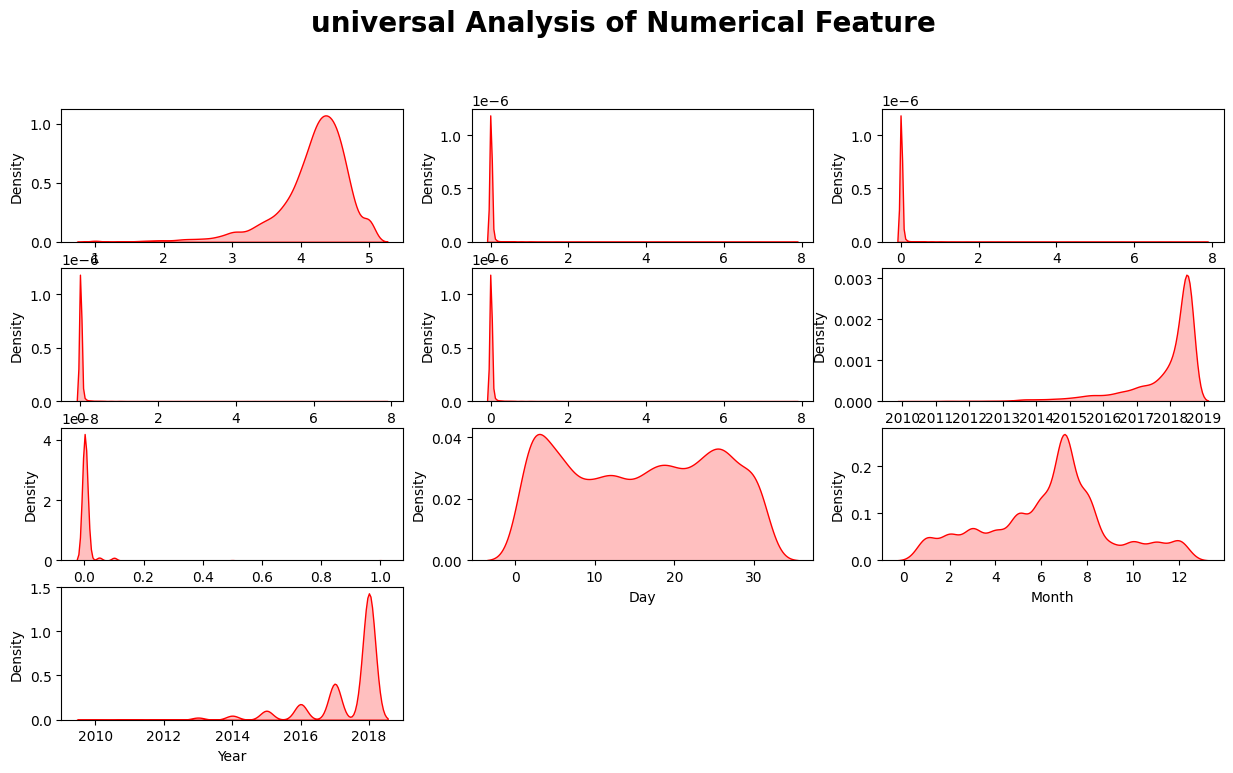

In [289]:
##Poporation of count data on categorical_feature
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.suptitle("universal Analysis of Numerical Feature",fontsize=20,fontweight="bold")  # Changed to suptitle

for i in range (0,len(numerical_feature)):
  plt.subplot(5,3,i+1)
  sns.kdeplot(df_copy[numerical_feature[i]],fill=True,color="red")
  plt.xlabel(numerical_feature[i])
  plt.tight_layout

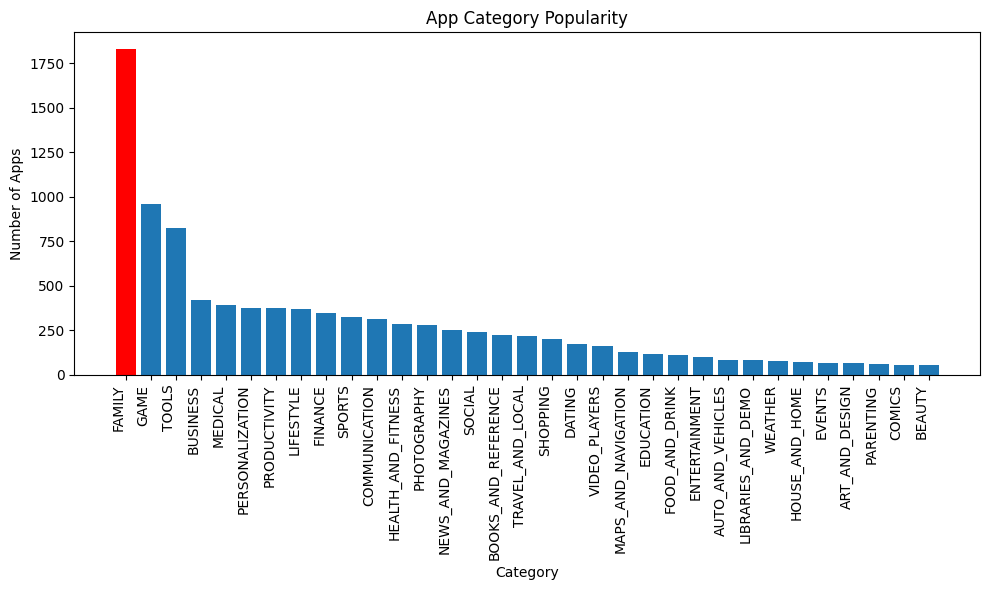

In [302]:
#which is most popular app categorical_feature

most_popular_category = df_copy['Category'].value_counts().idxmax()
category_counts = df_copy['Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title('App Category Popularity')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Highlight the most popular category
plt.bar(most_popular_category, category_counts[most_popular_category], color='red')

plt.show()

1.There are most kinds of app in playstore which are under category of family ,games & tools

2.Beauty,comics,arts and weather kinds of apps are very less in playstore

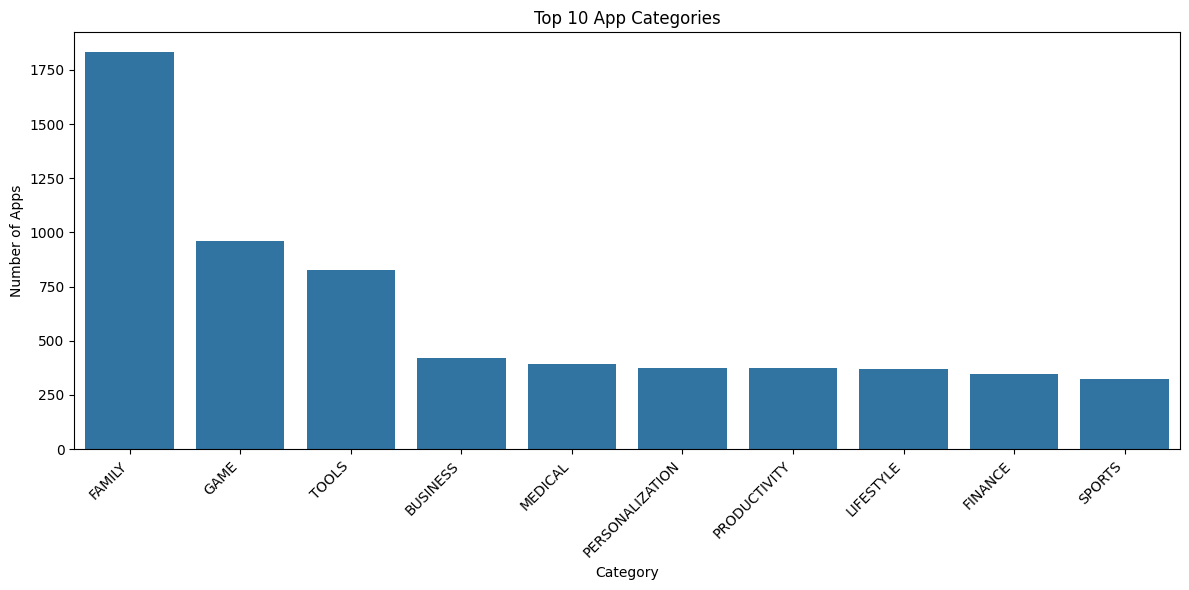

In [300]:
#Top 10 app categories
#datafram of app on the basic of categories
top10_categories = df_copy['Category'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy[df_copy['Category'].isin(top10_categories)], x='Category', order=top10_categories)
plt.title('Top 10 App Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [303]:
# Group by category and sum installations
category_installs = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False)

# Convert to a DataFrame for better display
category_installs_df = category_installs.reset_index()
category_installs_df.columns = ['Category', 'Total Installs']

print(category_installs_df)

               Category  Total Installs
0                  GAME       622298709
1         COMMUNICATION       285811368
2                 TOOLS       229356578
3                SOCIAL       227927801
4                FAMILY       143825488
5           PHOTOGRAPHY       105351270
6         VIDEO_PLAYERS        67484568
7          PRODUCTIVITY        55590649
8       PERSONALIZATION        53543080
9              SHOPPING        44551730
10               SPORTS        35348813
11        ENTERTAINMENT        34762650
12     TRAVEL_AND_LOCAL        26819741
13   NEWS_AND_MAGAZINES        23130228
14   HEALTH_AND_FITNESS        21361355
15  MAPS_AND_NAVIGATION        17729148
16  BOOKS_AND_REFERENCE        16721314
17            EDUCATION        13364148
18              FINANCE        12662106
19              WEATHER        12295164
20            LIFESTYLE        11832671
21             BUSINESS         9890245
22       FOOD_AND_DRINK         6325028
23               DATING         3623544


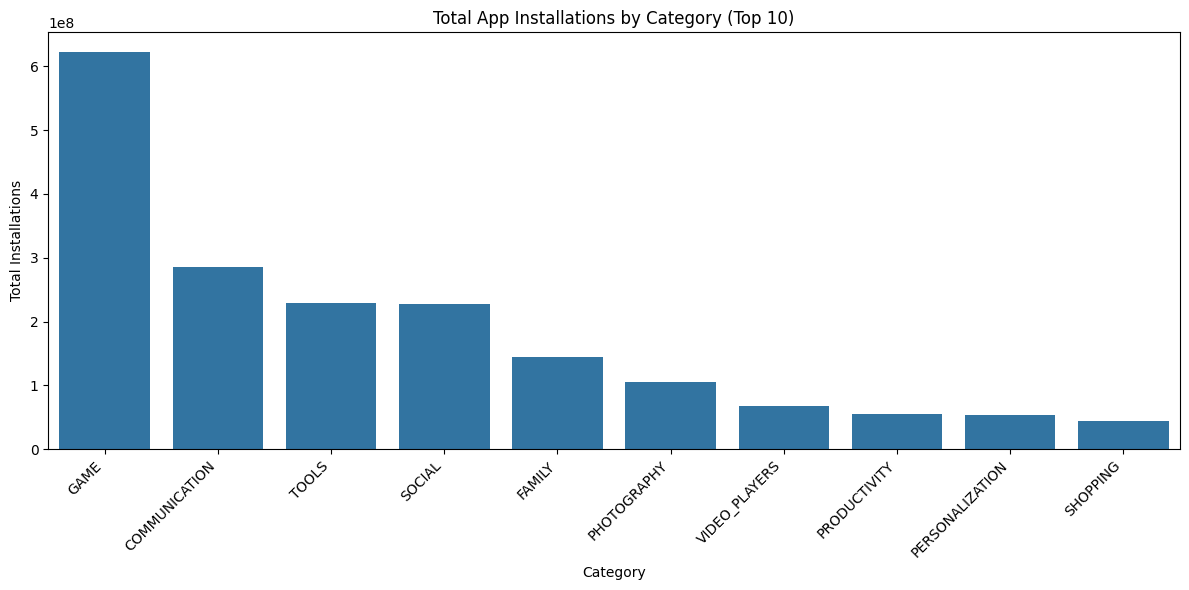

In [304]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Total Installs', data=category_installs_df.head(10)) # Top 10 for better visualization
plt.title('Total App Installations by Category (Top 10)')
plt.xlabel('Category')
plt.ylabel('Total Installations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

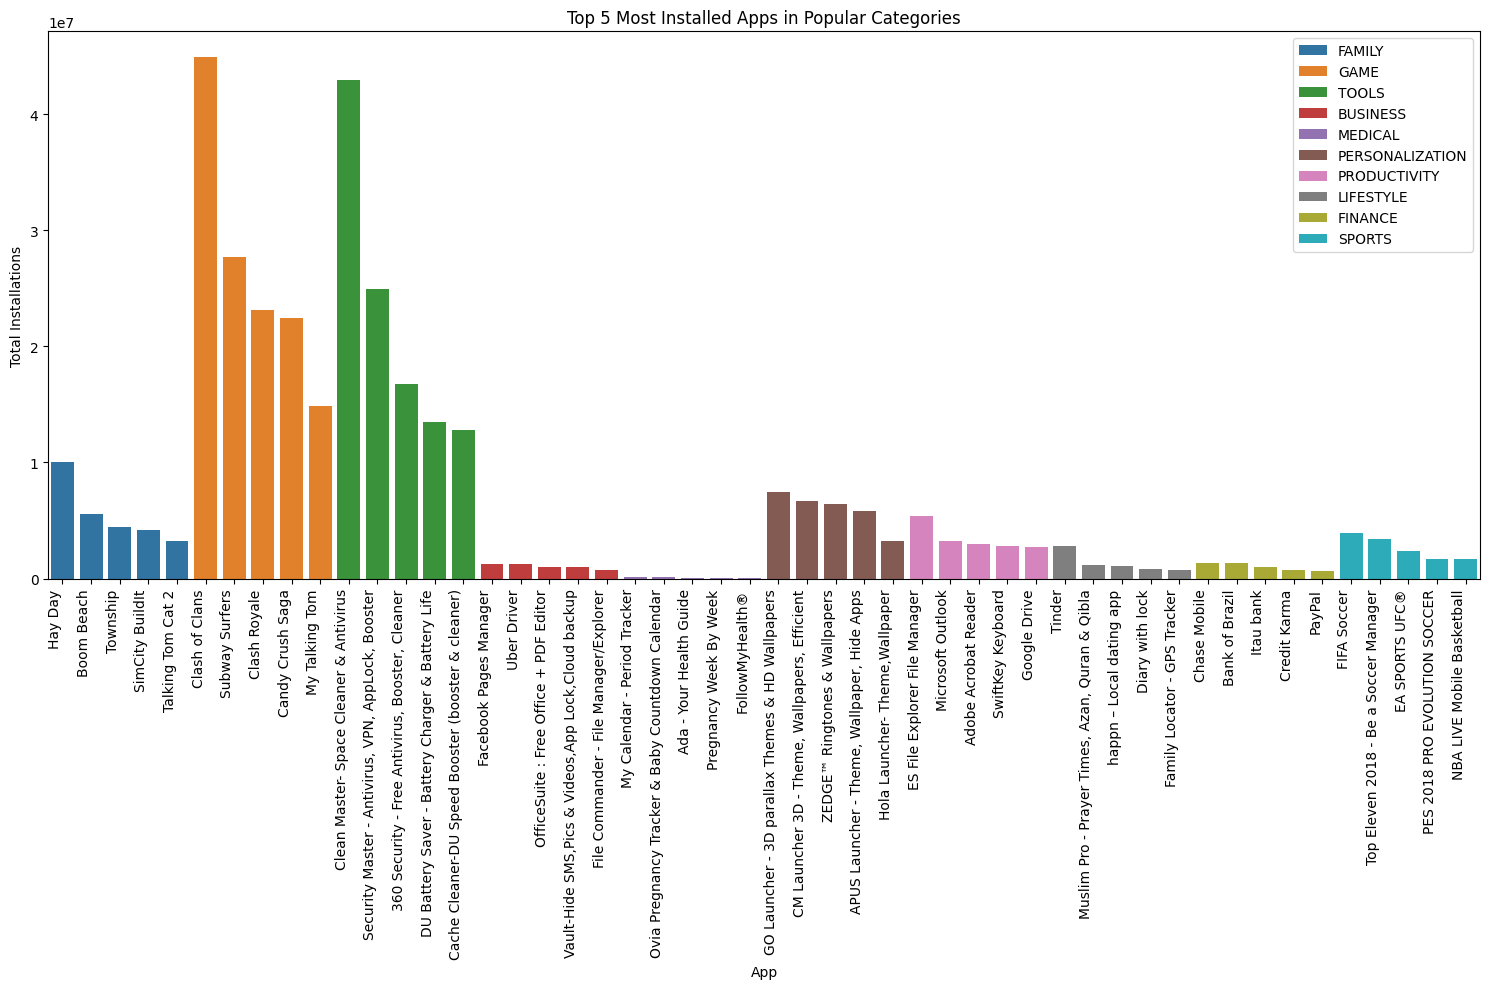

In [306]:
plt.figure(figsize=(15, 10))
sns.barplot(x='App', y='Installs', hue='Category', data=top_installed_apps_df)
plt.title('Top 5 Most Installed Apps in Popular Categories')
plt.xlabel('App')
plt.ylabel('Total Installations')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

In [307]:
# Filter apps with 5-star rating
five_star_apps = df_copy[df_copy['Rating'] == 5.0]

# Get the number of 5-star apps
num_five_star_apps = len(five_star_apps)

# Create a table (DataFrame)
five_star_apps_table = pd.DataFrame({'Rating': [5.0], 'Number of Apps': [num_five_star_apps]})

print(five_star_apps_table)

   Rating  Number of Apps
0     5.0             271


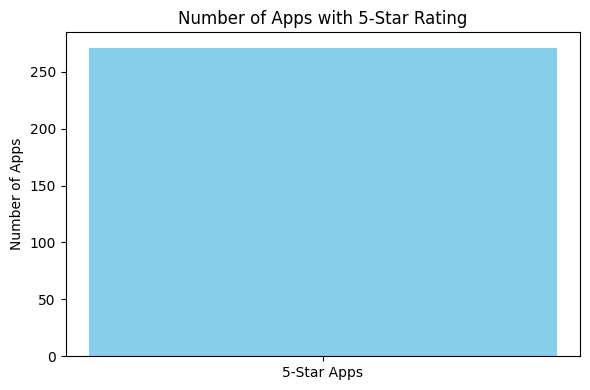

In [309]:
plt.figure(figsize=(6, 4))
plt.bar(['5-Star Apps'], five_star_apps_table['Number of Apps'], color='skyblue')
plt.title('Number of Apps with 5-Star Rating')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()

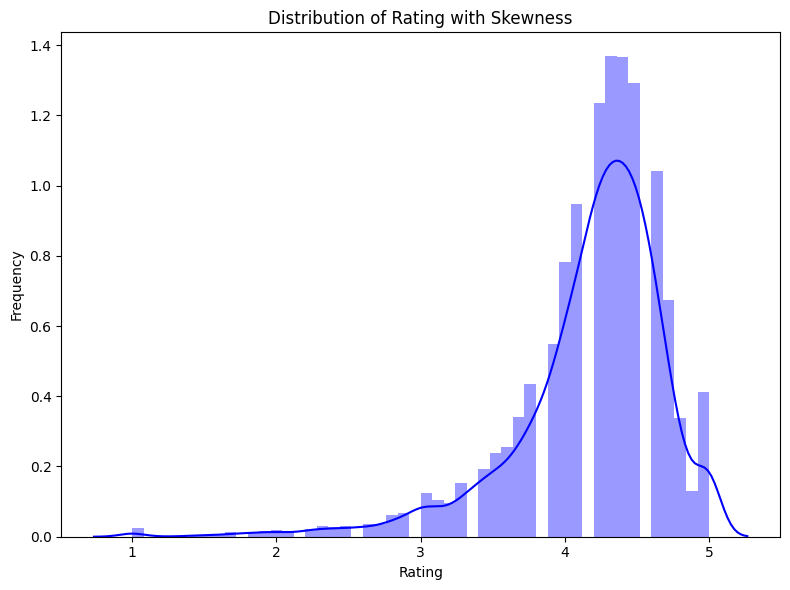

In [311]:
plt.figure(figsize=(8, 6))
sns.distplot(df_copy['Rating'], kde=True, color='blue')
plt.title('Distribution of Rating with Skewness')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

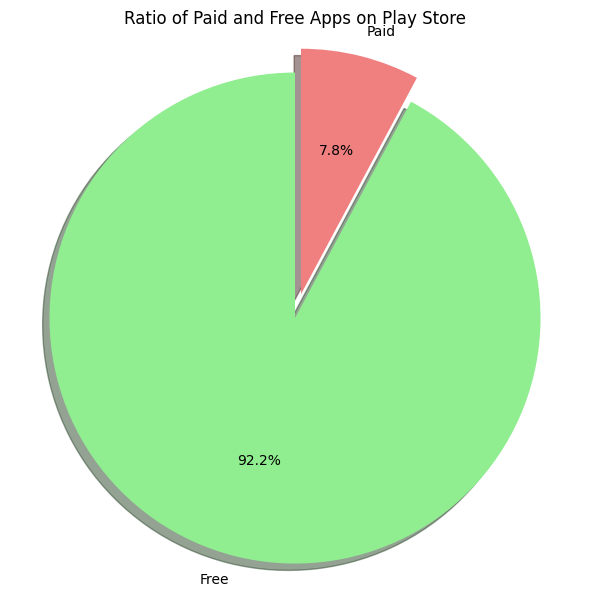

In [312]:
# Calculate the counts of paid and free apps
app_type_counts = df_copy['Type'].value_counts()

# Calculate percentages
total_apps = len(df_copy)
free_percentage = (app_type_counts['Free'] / total_apps) * 100
paid_percentage = (app_type_counts['Paid'] / total_apps) * 100

# Create the pie chart
labels = ['Free', 'Paid']
sizes = [free_percentage, paid_percentage]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # Explode the first slice (Free)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Ratio of Paid and Free Apps on Play Store')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [314]:
# Extract year from 'Last Updated' column
df_copy['UpdateYear'] = pd.to_datetime(df_copy['Last Updated']).dt.year

# Filter data for 2017 and 2018
updates_2017_2018 = df_copy[(df_copy['UpdateYear'] == 2017) | (df_copy['UpdateYear'] == 2018)]

# Group by update year and count apps
update_counts_2017_2018 = updates_2017_2018['UpdateYear'].value_counts().sort_index()

# Create a table (DataFrame)
update_table_2017_2018 = pd.DataFrame({'Update Year': update_counts_2017_2018.index, 'Number of Updates': update_counts_2017_2018.values})

print(update_table_2017_2018)

   Update Year  Number of Updates
0         2017               1794
1         2018               6284


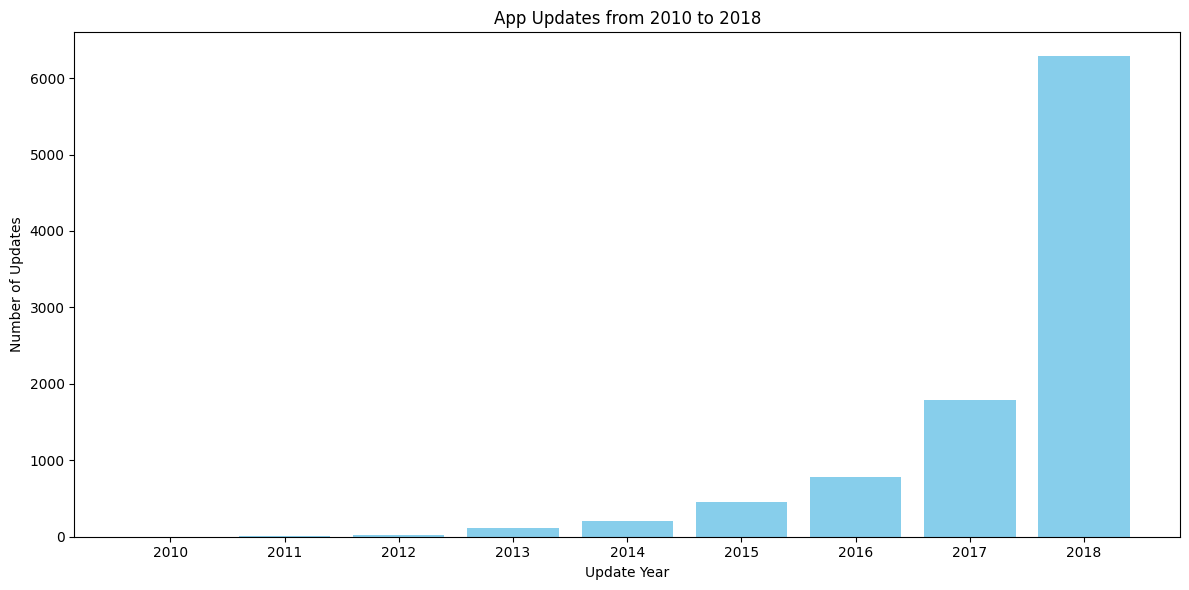

In [316]:

# Extract year from 'Last Updated' column
df_copy['UpdateYear'] = pd.to_datetime(df_copy['Last Updated']).dt.year

# Filter data for years 2010 to 2018
updates_2010_2018 = df_copy[(df_copy['UpdateYear'] >= 2010) & (df_copy['UpdateYear'] <= 2018)]

# Group by update year and count apps
update_counts_2010_2018 = updates_2010_2018['UpdateYear'].value_counts().sort_index()

# Create a table (DataFrame)
update_table_2010_2018 = pd.DataFrame({'Update Year': update_counts_2010_2018.index, 'Number of Updates': update_counts_2010_2018.values})

# Create the bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.bar(update_table_2010_2018['Update Year'], update_table_2010_2018['Number of Updates'], color='skyblue')
plt.title('App Updates from 2010 to 2018')
plt.xlabel('Update Year')
plt.ylabel('Number of Updates')
plt.xticks(update_table_2010_2018['Update Year'])  # Set x-axis ticks to all years in the range
plt.tight_layout()
plt.show()

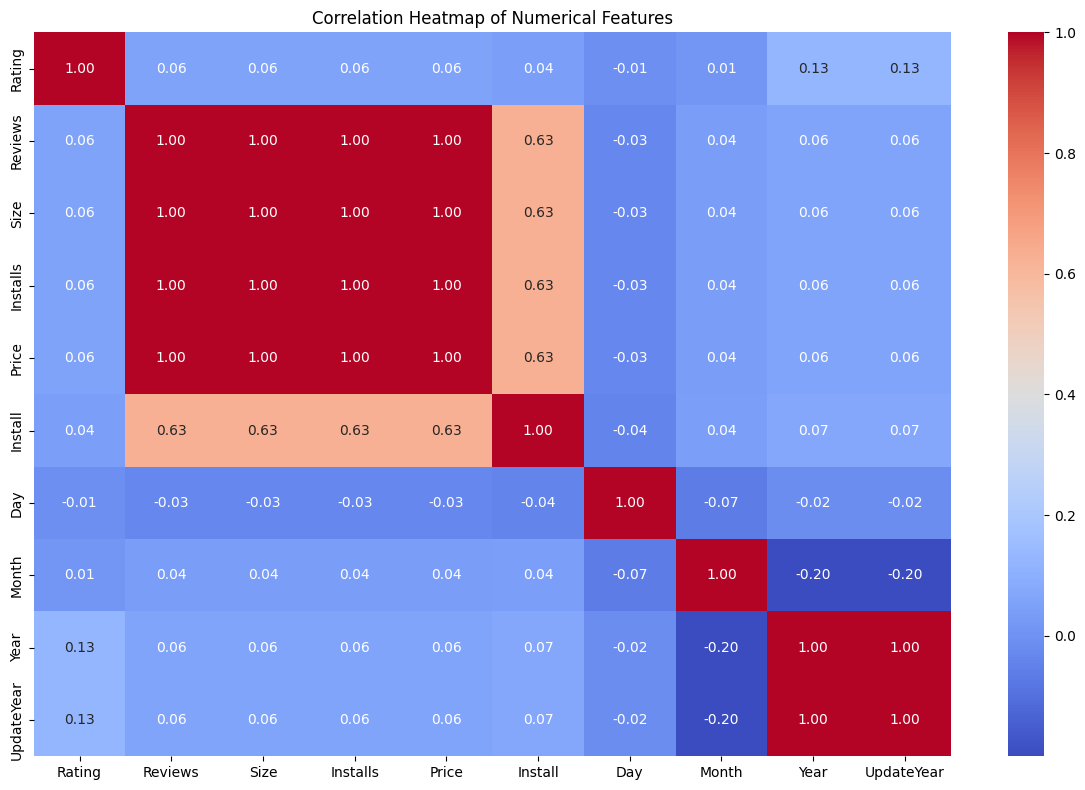

In [318]:
numerical_features = df_copy.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

**Conclusion**

This exploratory data analysis (EDA) and feature engineering of the Google Play Store dataset revealed several key insights into app characteristics and user engagement:

Category Distribution: The dataset is dominated by apps in categories such as Family, Game, and Tools. Categories like Beauty, Comics, and Art have fewer apps, indicating potential niche markets.
App Popularity: The 'FAMILY' category emerged as the most popular, signifying a large user base interested in family-oriented apps.

Installation Trends: The 'GAME' and 'COMMUNICATION' categories have the highest number of installations, highlighting the widespread usage of gaming and communication apps.

Rating and Reviews: There's a positive correlation between app ratings and reviews, indicating that apps with higher ratings tend to have more reviews, suggesting greater user engagement.

5-Star Apps: A significant number of apps have achieved a 5-star rating, reflecting overall user satisfaction with a portion of the apps on the Play Store.

App Updates: App update frequency is skewed towards recent years, with a significant increase in updates during 2017 and 2018. This suggests continuous development and improvement in the app ecosystem.
Overall, this analysis provides valuable insights for app developers and businesses. Understanding user preferences, category distributions, and factors contributing to app success can inform strategic decisions for app development and marketing. The engineered features enhance the dataset's potential for further analysis, including predictive modeling and market trend predictions. Continued monitoring of app updates and user engagement can assist in keeping apps relevant and competitive in the dynamic Google Play Store environment.

Key takeaways:


The 'FAMILY', 'GAME', and 'COMMUNICATION' categories are dominant and crucial for app developers to consider.
Positive ratings and reviews are vital for app success.
Regular updates are important for maintaining user engagement.
Understanding market trends and user preferences is essential for developing successful apps.